In [268]:
import pandas as pd
import numpy as np
import os


In [269]:
os.getcwd()

'C:\\Users\\Dashang\\Downloads\\CreditConsumptionDataSet_2'

In [270]:
#feature selection
from sklearn.feature_selection import RFE

In [271]:
def feature_selection(predictors,target,number_of_features,modelname,model):
    print(modelname)
    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

In [272]:
traindt = pd.read_csv("Train.csv")
testdt = pd.read_csv("Test.csv")

In [273]:
traindt.head(5)

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [274]:
testdt.isnull().sum()

ID                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
c

In [275]:
def preprocessing_df(df):
    #drop loan_enq
    #df = df.drop(['loan_enq'],axis=1)
   
    #dropping rows with age>100
    #df=df.drop(df[df['age']>100].index) 
   
    return df

In [276]:
traindt = preprocessing_df(traindt)

In [277]:
testdt = preprocessing_df(testdt)

In [278]:
traindt.shape

(15000, 44)

In [279]:
testdt.shape

(5000, 43)

## Outlier

In [280]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers



In [281]:
detect_outliers(traindt)

,Feature,Number of Outliers
0,ID,0
1,age,534
2,region_code,0
3,cc_cons_apr,1217
4,dc_cons_apr,1220
5,cc_cons_may,1202
6,dc_cons_may,1248
7,cc_cons_jun,1181
8,dc_cons_jun,1366
9,cc_count_apr,883


In [282]:
X= traindt.drop(["ID","cc_cons"],axis=1)
y=traindt.cc_cons

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

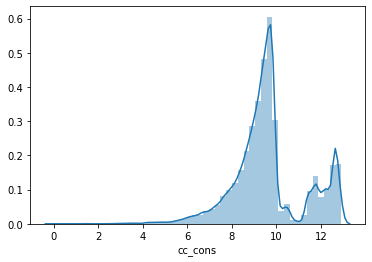

In [284]:
y = np.log1p(y)    #transfomed target variable because it was right skewed

sns.distplot(y)

In [285]:
#treat categorical data
# Split into categorical and numerical columns
X_cols = X.columns
num_cols = X.select_dtypes(exclude=['object','category']).columns
cat_cols = [i for i in X_cols if i not in X[num_cols].columns]
for i in cat_cols:
    X[i] = X[i].astype('category')

In [286]:
X_cols

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [287]:
cat_cols

['account_type', 'gender', 'loan_enq']

In [288]:
num_cols

Index(['age', 'region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active'],
      dtype='object')

In [289]:
from scipy.stats.mstats import winsorize

In [290]:
 # Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))
    
    return dataframe    



In [291]:
X[num_cols] = treat_outliers(X[num_cols])

# Checking for outliers after applying winsorization
detect_outliers(X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Feature,Number of Outliers
0,age,0
1,region_code,0
2,cc_cons_apr,0
3,dc_cons_apr,0
4,cc_cons_may,0
5,dc_cons_may,0
6,cc_cons_jun,0
7,dc_cons_jun,0
8,cc_count_apr,0
9,cc_count_may,0


In [292]:
from sklearn.preprocessing import Binarizer ,LabelEncoder


In [293]:
X.head(5)

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,current,M,35,708,24893.00,659.00,10288.00,16077.96,16291.40,11432.00,...,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09
1,current,M,35,269,18941.62,966.00,20672.00,744.00,4217.00,885.00,...,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34
2,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,...,2.0,82.0,11999.0,58373.25,75283.0,7.0,7.0,27036.0,Y,19817.94
3,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,...,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33
4,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,...,24.0,50.0,25213.0,12678.46,80140.0,8.0,32.0,32044.0,Y,12780.44


## Binarize Gender

In [294]:
#Label Encoding to be able to use categorical variables like age group in the regression eq
cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
le = LabelEncoder()
for i in cols:
    X[i] = le.fit_transform(X[i])

In [295]:


#X['gender'] = X['gender'].str.replace('M','1')
#X['gender'] = X['gender'].str.replace('F','0')
#X['gender'] = X['gender'].astype('int32')

## Binarize Account_Type

In [296]:
X.account_type.value_counts()

0    12727
1     2273
Name: account_type, dtype: int64

In [297]:
#X['account_type'] = X['account_type'].str.replace('saving','1')
#X['account_type'] = X['account_type'].str.replace('current','0')
#X['account_type'] = X['account_type'].astype('int32')

In [298]:
X.head(5)

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,0,1,35,708,24893.00,659.00,10288.00,16077.96,16291.40,11432.00,...,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,0,1674.09
1,0,1,35,269,18941.62,966.00,20672.00,744.00,4217.00,885.00,...,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,0,13043.34
2,0,1,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,...,2.0,82.0,11999.0,58373.25,75283.0,7.0,7.0,27036.0,0,19817.94
3,0,0,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,...,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,0,3544.33
4,0,1,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,...,24.0,50.0,25213.0,12678.46,80140.0,8.0,32.0,32044.0,0,12780.44


In [299]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [300]:
# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_cols)


In [301]:
from sklearn.model_selection import train_test_split

In [302]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=72)

In [303]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column, predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [304]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,mean_squared_log_error,r2_score

## RFE

In [305]:
X_train.columns.shape

(42,)

In [306]:
# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models ={'Linear Regression': LinearRegression
   # 'Random Forest':RandomForestRegressor
        }
    



In [307]:
# Selecting 8 number of features
for modelname, model in models.items():
    feature_selection(X,y,10,modelname,model)
    #print(modelname)

Linear Regression
Features  to be selected for l are:
['cc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'investment_3', 'credit_amount_apr', 'debit_count_apr', 'credit_count_jun', 'emi_active']


In [308]:
X.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,-0.422607,0.398433,-0.690316,0.539070,0.809060,-0.964638,-0.227645,2.106717,0.792748,1.265197,...,-0.630769,0.117180,-0.602444,-0.690135,-1.050461,-0.794193,0.623943,0.386211,0.0,-0.755371
1,-0.422607,0.398433,-0.690316,-1.573825,0.338257,-0.911368,0.686925,-0.984309,-0.659263,-0.882986,...,-0.630769,1.407085,-0.623685,-0.413968,0.320674,0.220925,0.563532,-0.608822,0.0,1.064174
2,-0.422607,0.398433,0.949324,0.991490,-0.710936,-0.606322,-0.960737,-0.341447,1.714488,-0.010637,...,-0.630769,1.542865,-1.036396,-0.041995,0.300727,-0.527057,-1.127982,-0.471514,0.0,2.148387
3,-0.422607,-2.509835,-1.182208,1.304333,1.251789,-0.864518,-0.023146,0.707785,0.940614,1.717014,...,0.827201,0.049290,-1.015396,0.220682,0.158632,0.220925,1.167644,0.105144,0.0,-0.456056
4,-0.422607,0.398433,-0.772298,0.991490,-0.571505,0.119341,-0.749401,-0.743420,-0.911319,0.327707,...,0.896628,0.456629,-0.579993,-1.087709,0.405693,-0.473629,-0.372842,-0.291031,0.0,1.022100


In [309]:
X= X[['cc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'investment_3', 'credit_amount_apr', 'debit_count_apr', 'credit_count_jun', 'emi_active']]

In [310]:
X.head()

,cc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,investment_3,credit_amount_apr,debit_count_apr,credit_count_jun,emi_active
0,-0.227645,0.792748,1.265197,-0.849919,-0.144123,-0.771460,-0.823042,-0.406487,-0.794193,-0.755371
1,0.686925,-0.659263,-0.882986,-0.849919,-0.853367,1.471595,0.606784,0.013637,0.220925,1.064174
2,-0.960737,1.714488,-0.010637,0.729364,0.079848,-0.153144,0.520921,1.426783,-0.527057,2.148387
3,-0.023146,0.940614,1.717014,1.114555,-1.002681,0.421155,2.078846,0.319182,0.220925,-0.456056
4,-0.749401,-0.911319,0.327707,1.653822,0.639778,2.358339,-0.064124,0.433762,-0.473629,1.022100


In [311]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=72)

In [312]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Train RMSE:',np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))


Train RMSE: 1.6089089153394258
Test RMSE: 1.6121577712996513


In [313]:
rmsle(y_test,y_pred)

0.15973478923201515

## test data detect outlier

In [314]:
testdt = pd.read_csv("Test.csv")
testdt= preprocessing_df(testdt)

In [315]:
testdt.isnull().sum()

ID                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
c

In [316]:
testdt.head()


,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,...,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,...,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,...,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [317]:
detect_outliers(testdt)

,Feature,Number of Outliers
0,ID,0
1,age,172
2,region_code,0
3,cc_cons_apr,404
4,dc_cons_apr,386
5,cc_cons_may,413
6,dc_cons_may,409
7,cc_cons_jun,401
8,dc_cons_jun,488
9,cc_count_apr,298


In [318]:
testdt[num_cols] = treat_outliers(testdt[num_cols])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [319]:
detect_outliers(testdt)

,Feature,Number of Outliers
0,ID,0
1,age,0
2,region_code,0
3,cc_cons_apr,0
4,dc_cons_apr,0
5,cc_cons_may,0
6,dc_cons_may,0
7,cc_cons_jun,0
8,dc_cons_jun,0
9,cc_count_apr,0


In [320]:
testdt.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,690.48,9146.10,...,24.0,20.0,12257.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,1344.00,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,690.48,4260.27,...,3.0,6.0,97825.0,93572.42,109429.75,21.0,7.0,72317.00,Y,472.47
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,...,43.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [321]:
test_id_col = testdt['ID']

In [322]:
test_id_col.isnull().sum()

0

In [323]:
testdt = testdt.drop(['ID'],axis=1)

In [324]:
testdt.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,current,M,37,575,2795.45,1290.0,6141.05,690.48,9146.10,15479.00,...,24.0,20.0,12257.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,current,M,53,324,5985.20,6189.0,2696.09,766.00,1344.00,4133.22,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,current,M,33,370,2105.93,18225.0,34763.56,690.48,4260.27,15620.69,...,3.0,6.0,97825.0,93572.42,109429.75,21.0,7.0,72317.00,Y,472.47
4,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,...,43.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [325]:
# Label Encoding 
for i in cat_cols: 
    testdt[i] = le.fit_transform(testdt[i])

## Binarize Gender TestData

In [326]:
#testdt['gender'] = testdt['gender'].str.replace('M','1')
#testdt['gender'] = testdt['gender'].str.replace('F','0')
#testdt['gender'] = testdt['gender'].astype('int32')

## Binarize Account_Type  TestData

In [327]:
testdt.account_type.value_counts()

0    4199
1     801
Name: account_type, dtype: int64

In [328]:
#testdt['account_type'] = testdt['account_type'].str.replace('saving','1')
#testdt['account_type'] = testdt['account_type'].str.replace('current','0')
#testdt['account_type'] = testdt['account_type'].astype('int32')

In [329]:
testdt

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,0,1,37,575,2795.450,1290.00,6141.05,690.48,9146.10,15479.00,...,24.0,20.0,12257.0,30527.88,31271.00,3.0,12.0,25945.92,0,1170.49
1,0,1,33,394,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,0,16447.45
2,0,1,53,324,5985.200,6189.00,2696.09,766.00,1344.00,4133.22,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,0,2622.28
3,0,1,33,370,2105.930,18225.00,34763.56,690.48,4260.27,15620.69,...,3.0,6.0,97825.0,93572.42,109429.75,21.0,7.0,72317.00,0,472.47
4,0,1,62,505,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,...,43.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,0,2812.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,35,523,4641.500,5979.58,6008.61,4410.00,26166.96,1884.00,...,35.0,11.0,32944.0,105488.53,125470.83,21.0,50.0,58037.00,0,7870.88
4996,0,1,53,723,4994.450,2805.37,23214.00,5870.00,1344.00,1008.73,...,5.0,8.0,12257.0,77112.66,86559.00,49.0,38.0,24110.00,0,3668.30
4997,0,1,62,863,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,...,10.0,84.0,35819.0,57192.48,80627.00,2.0,18.0,10998.00,0,5450.34
4998,0,1,34,882,12824.010,4866.00,12242.48,690.48,15132.77,15620.69,...,11.0,12.0,39083.0,82039.00,24332.00,49.0,64.0,37255.00,0,472.47


## Standize Test Data

In [330]:
X.shape

(15000, 10)

In [331]:
testdt.shape

(5000, 42)

In [332]:
X.columns

Index(['cc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'investment_3', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_jun', 'emi_active'],
      dtype='object')

In [333]:
testdt.columns

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [334]:
testdt

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,0,1,37,575,2795.450,1290.00,6141.05,690.48,9146.10,15479.00,...,24.0,20.0,12257.0,30527.88,31271.00,3.0,12.0,25945.92,0,1170.49
1,0,1,33,394,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,...,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,0,16447.45
2,0,1,53,324,5985.200,6189.00,2696.09,766.00,1344.00,4133.22,...,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,0,2622.28
3,0,1,33,370,2105.930,18225.00,34763.56,690.48,4260.27,15620.69,...,3.0,6.0,97825.0,93572.42,109429.75,21.0,7.0,72317.00,0,472.47
4,0,1,62,505,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,...,43.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,0,2812.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,35,523,4641.500,5979.58,6008.61,4410.00,26166.96,1884.00,...,35.0,11.0,32944.0,105488.53,125470.83,21.0,50.0,58037.00,0,7870.88
4996,0,1,53,723,4994.450,2805.37,23214.00,5870.00,1344.00,1008.73,...,5.0,8.0,12257.0,77112.66,86559.00,49.0,38.0,24110.00,0,3668.30
4997,0,1,62,863,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,...,10.0,84.0,35819.0,57192.48,80627.00,2.0,18.0,10998.00,0,5450.34
4998,0,1,34,882,12824.010,4866.00,12242.48,690.48,15132.77,15620.69,...,11.0,12.0,39083.0,82039.00,24332.00,49.0,64.0,37255.00,0,472.47


In [335]:
testdt.columns

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [336]:
testdt_col = testdt.columns

In [337]:
testdt_col


Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [338]:
# Standardization for Test
#scaler = StandardScaler()

testdt = scaler.transform(testdt)
testdt = pd.DataFrame(testdt, columns=testdt_col)


In [339]:
testdt

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,-0.422607,0.398433,-0.526352,-0.101055,-0.939038,-0.855148,-0.592888,-0.995097,-0.066512,2.089478,...,0.896628,-0.561718,-1.027485,-0.679229,-0.650434,-0.740766,-0.976954,-0.510799,0.0,-0.835967
1,-0.422607,0.398433,-0.854280,-0.972203,1.166006,-0.794416,-0.986675,-0.637607,0.150116,-0.868525,...,2.215744,0.117180,-0.864805,-1.049620,-0.967884,-0.580484,-0.161403,-1.005682,0.0,1.608971
2,-0.422607,0.398433,0.785360,-1.309111,-0.686703,-0.005079,-0.896302,-0.979874,-1.004757,-0.221398,...,2.146317,-0.052544,-0.193670,-0.634026,-0.601408,-0.633911,-1.067570,-0.969607,0.0,-0.603622
3,-0.422607,0.398433,-0.854280,-1.087714,-0.993585,2.083393,1.928038,-0.995097,-0.654060,2.118337,...,-0.561342,-1.036946,1.927979,0.763528,1.038685,0.220925,-1.127982,1.160361,0.0,-0.947679
4,-0.422607,0.398433,1.523198,-0.437963,-0.901577,-0.466119,-0.855584,-0.590064,-0.760701,-0.020414,...,2.215744,1.305251,-0.485942,-0.942779,-0.431511,-0.580484,-0.282225,0.080169,0.0,-0.573227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.422607,0.398433,-0.690316,-0.351330,-0.793001,-0.041417,-0.604552,-0.245315,1.980338,-0.679513,...,1.660327,-0.867221,-0.312969,1.036225,1.385356,0.220925,0.170859,0.645726,0.0,0.236369
4996,-0.422607,0.398433,0.785360,0.611265,-0.765079,-0.592203,0.910811,0.048992,-1.004757,-0.857785,...,-0.422487,-0.969056,-1.027485,0.386851,0.544417,1.716889,-0.191608,-0.576964,0.0,-0.436216
4997,-0.422607,0.398433,1.523198,1.285081,-0.902119,-0.580815,-0.487708,1.239131,-0.669725,-0.775445,...,-0.075352,1.610755,-0.213669,-0.069017,0.416218,-0.794193,-0.795720,-1.049505,0.0,-0.151016
4998,-0.422607,0.398433,-0.772298,1.376527,-0.145697,-0.234644,-0.055505,-0.995097,0.653417,2.118337,...,-0.005924,-0.833277,-0.100932,0.499589,-0.800396,1.716889,0.593737,-0.103233,0.0,-0.947679


In [340]:
testdt.shape

(5000, 42)

In [341]:
testdt.head()


,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,-0.422607,0.398433,-0.526352,-0.101055,-0.939038,-0.855148,-0.592888,-0.995097,-0.066512,2.089478,...,0.896628,-0.561718,-1.027485,-0.679229,-0.650434,-0.740766,-0.976954,-0.510799,0.0,-0.835967
1,-0.422607,0.398433,-0.854280,-0.972203,1.166006,-0.794416,-0.986675,-0.637607,0.150116,-0.868525,...,2.215744,0.117180,-0.864805,-1.049620,-0.967884,-0.580484,-0.161403,-1.005682,0.0,1.608971
2,-0.422607,0.398433,0.785360,-1.309111,-0.686703,-0.005079,-0.896302,-0.979874,-1.004757,-0.221398,...,2.146317,-0.052544,-0.193670,-0.634026,-0.601408,-0.633911,-1.067570,-0.969607,0.0,-0.603622
3,-0.422607,0.398433,-0.854280,-1.087714,-0.993585,2.083393,1.928038,-0.995097,-0.654060,2.118337,...,-0.561342,-1.036946,1.927979,0.763528,1.038685,0.220925,-1.127982,1.160361,0.0,-0.947679
4,-0.422607,0.398433,1.523198,-0.437963,-0.901577,-0.466119,-0.855584,-0.590064,-0.760701,-0.020414,...,2.215744,1.305251,-0.485942,-0.942779,-0.431511,-0.580484,-0.282225,0.080169,0.0,-0.573227


In [343]:
testdt =testdt[['cc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'investment_3', 'credit_amount_apr', 'debit_count_apr', 'credit_count_jun', 'emi_active']]

In [344]:
testdt['cc_cons'] = lr.predict(testdt)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [345]:
testdt['cc_cons'] = np.exp(testdt['cc_cons'])-1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [346]:
submissions_lr = pd.concat([test_id_col, testdt['cc_cons']], axis=1) 


In [347]:
submissions_lr.to_csv('submission_LinearReg_RFE.csv', index=False) 

In [348]:
submissions_lr

,ID,cc_cons
0,17591,14314.356612
1,13541,15422.281067
2,13431,14378.430719
3,8687,16145.752484
4,14727,13479.953046
...,...,...
4995,12512,15244.424426
4996,14224,16436.957167
4997,18740,16210.082976
4998,18134,14366.104412
